In [1]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#simple gene expression model

def simple_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr, pr_a, tr (inactive promoter, active promoter, and mRNA transcript)
    pr = states[0]
    pr_a = states[1]
    tr = states[2]
    
    # TF (transcription factor) dynamics
    if t > TF_on and t < TF_off:
        TF = TF_amp
    else:
        TF = 0
   
    # Hill Equation
    H = TF/(TF + Kd)
    
    ### implement the change equations
    pr_prime = -k_a*H*pr + k_d*pr_a
    pr_a_prime = k_a*H*pr - k_d*pr_a 
    tr_prime = -k_deg*tr + k_syn*pr_a
    ###
    
    statesprime = [pr_prime, pr_a_prime, tr_prime]
    return statesprime

In [8]:
#Simulation of simple model

#initial conditions
pr0 = 1
pr_a0 = 0
tr0 = 0 
states0 = [pr0, pr_a0, tr0]

#parameters
k_a = 0.2
k_d = 0.05
Kd = 0.1
k_syn = 0.2
k_deg = 0.01

#TF activation
TF_on = 0
TF_off = 240
TF_amp = 1

t = np.linspace(0,720,1000)
solution = odeint(simple_model,states0,t)

In [9]:
#Checking Model Implementation
#checks only work on default parameter values
print("Checks on Model Implementation:")
print("For each of the following lines ensure that your value on the right matches that on the left")
print(0.9883232346558297, solution[200, 0])
print(0.011676765344169468, solution[200, 1])
print(1.0821626972250435, solution[400, 2])

Checks on Model Implementation:
For each of the following lines ensure that your value on the right matches that on the left
0.9883232346558297 0.21568626814145725
0.011676765344169468 0.7843137318585428
1.0821626972250435 10.829821704773678


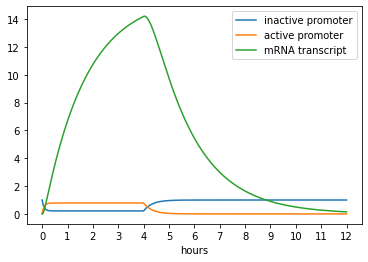

In [10]:
#Plot Dynamics
lineObjects=plt.plot(t/60, solution)
plt.xlabel('hours')
plt.xticks(np.arange(0, 13, step=1))
plt.legend(lineObjects, ('inactive promoter', 'active promoter', 'mRNA transcript'))

In [20]:
#OR gate gene expression model

def OR_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr, pr_a, tr (inactive promoter, active promoter, and mRNA transcript)
    pr = states[0]
    pr_a = states[1]
    tr = states[2]
    
    # TF1 (transcription factor) dynamics
    if t > TF1_on and t < TF1_off:
        TF1 = TF1_amp
    else:
        TF1 = 0
    
    # TF2 (transcription factor) dynamics
    if t > TF2_on and t < TF2_off:
        TF2 = TF2_amp
    else:
        TF2 = 0
   
    # Hill Equation
    H = 1 - ((Kd1/(TF1 + Kd1))*(Kd2/(TF2 + Kd2)))
    
    ### implement the change equations
    pr_prime = -k_a*H*pr + k_d*pr_a
    pr_a_prime = k_a*H*pr - k_d*pr_a 
    tr_prime = -k_deg*tr + k_syn*pr_a
    ###
    
    statesprime = [pr_prime, pr_a_prime, tr_prime]
    return statesprime

In [31]:
#Simulation of OR model

#initial conditions
pr0 = 1
pr_a0 = 0
tr0 = 0 
states0 = [pr0, pr_a0, tr0]

#parameters
k_a = 0.2
k_d = 0.05
Kd1 = 0.1
Kd2 = 0.1
k_syn = 0.2
k_deg = 0.01

#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 240
TF2_off = 360
TF2_amp = 1

t = np.linspace(0,720,1000)
solution = odeint(OR_model,states0,t)

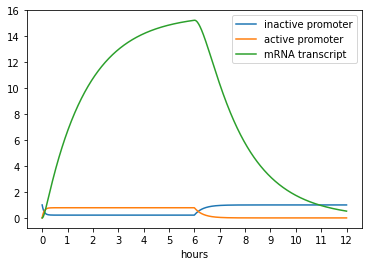

In [32]:
#Plot Dynamics - OR model
lineObjects=plt.plot(t/60, solution)
plt.xlabel('hours')
plt.xticks(np.arange(0, 13, step=1))
plt.legend(lineObjects, ('inactive promoter', 'active promoter', 'mRNA transcript'))

In [33]:
#AND gate gene expression model

def AND_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr, pr_a, tr (inactive promoter, active promoter, and mRNA transcript)
    pr = states[0]
    pr_a = states[1]
    tr = states[2]
    
    # TF1 (transcription factor) dynamics
    if t > TF1_on and t < TF1_off:
        TF1 = TF1_amp
    else:
        TF1 = 0
    
    # TF2 (transcription factor) dynamics
    if t > TF2_on and t < TF2_off:
        TF2 = TF2_amp
    else:
        TF2 = 0
   
    # Hill Equation
    H = (TF1/(TF1 + Kd1))*(TF2/(TF2 + Kd2))
    
    ### implement the change equations
    pr_prime = -k_a*H*pr + k_d*pr_a
    pr_a_prime = k_a*H*pr - k_d*pr_a 
    tr_prime = -k_deg*tr + k_syn*pr_a
    ###
    
    statesprime = [pr_prime, pr_a_prime, tr_prime]
    return statesprime

In [42]:
#Simulation of AND model

#initial conditions
pr0 = 1
pr_a0 = 0
tr0 = 0 
states0 = [pr0, pr_a0, tr0]

#parameters
k_a = 0.2
k_d = 0.05
Kd1 = 0.1
Kd2 = 0.1
k_syn = 0.2
k_deg = 0.01

#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 240
TF2_off = 360
TF2_amp = 1

t = np.linspace(0,720,1000)
solution = odeint(AND_model,states0,t)

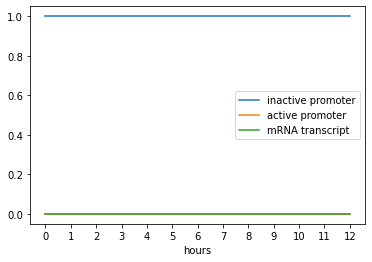

In [43]:
#Plot Dynamics - AND model
lineObjects=plt.plot(t/60, solution)
plt.xlabel('hours')
plt.xticks(np.arange(0, 13, step=1))
plt.legend(lineObjects, ('inactive promoter', 'active promoter', 'mRNA transcript'))

In [57]:
# Two step gene expression model

def two_step_model(states, t):
    # Our "states" list has the state variables in the following order:
    # pr_c, pr, pr_a, tr (closed promoter, open/inactive promoter, active promoter, and mRNA transcript)
    pr_c = states[0]
    pr = states[1]
    pr_a = states[2]
    tr = states[3]
    
    # TF1 (transcription factor) dynamics
    if t > TF1_on and t < TF1_off:
        TF1 = TF1_amp
    else:
        TF1 = 0
    
    # TF2 (transcription factor) dynamics
    if t > TF2_on and t < TF2_off:
        TF2 = TF2_amp
    else:
        TF2 = 0
   
    # Hill Equation 1
    H1 = TF1/(TF1 + Kd1)
    
    # Hill Equation 2
    H2 = TF2/(TF2 + Kd2)
    
    ### implement the change equations
    pr_c_prime = -k_a1*H1*pr_c + k_d1*pr 
    pr_prime = -k_d1*pr + k_a1*H1*pr_c - k_a2*H2*pr + k_d2*pr_a
    pr_a_prime = k_a2*H2*pr - k_d2*pr_a
    tr_prime = pr_a*k_syn - tr*k_deg
    ###
    
    statesprime = [pr_c_prime, pr_prime, pr_a_prime, tr_prime]
    return statesprime

In [76]:
#Simulation of two step model

#initial conditions
pr_c0 = 1
pr0 = 0
pr_a0 = 0
tr0 = 0 
states0 = [pr_c0, pr0, pr_a0, tr0]

#parameters
k_a1 = 0.02
k_d1 = 0.01
k_a2 = 0.2
k_d2 = 0.05
Kd1 = 0.1
Kd2 = 0.1
k_syn = 0.2
k_deg = 0.01

#TF1 activation
TF1_on = 240
TF1_off = 360
TF1_amp = 1

#TF2 activation
TF2_on = 0
TF2_off = 240
TF2_amp = 1

t = np.linspace(0,720,1000)
solution = odeint(two_step_model,states0,t)

In [77]:
#Checking Model Implementation
#checks only work on default parameter values
print("Checks on Model Implementation:")
print("For each of the following lines ensure that your value on the right matches that on the left")
print(0.1587758441005651, solution[200, 0])
print(0.18526297221799834, solution[200, 1])
print(0.6559611836814355, solution[200, 2])
print(8.90108698195752, solution[400, 3])

Checks on Model Implementation:
For each of the following lines ensure that your value on the right matches that on the left
0.1587758441005651 1.0
0.18526297221799834 0.0
0.6559611836814355 0.0
8.90108698195752 0.0


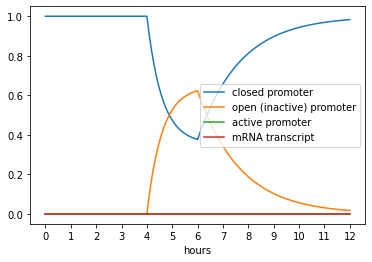

In [78]:
#Plot Dynamics - two step model
lineObjects=plt.plot(t/60, solution)
plt.xlabel('hours')
plt.xticks(np.arange(0, 13, step=1))
plt.legend(lineObjects, ('closed promoter', 'open (inactive) promoter', 'active promoter', 'mRNA transcript'))

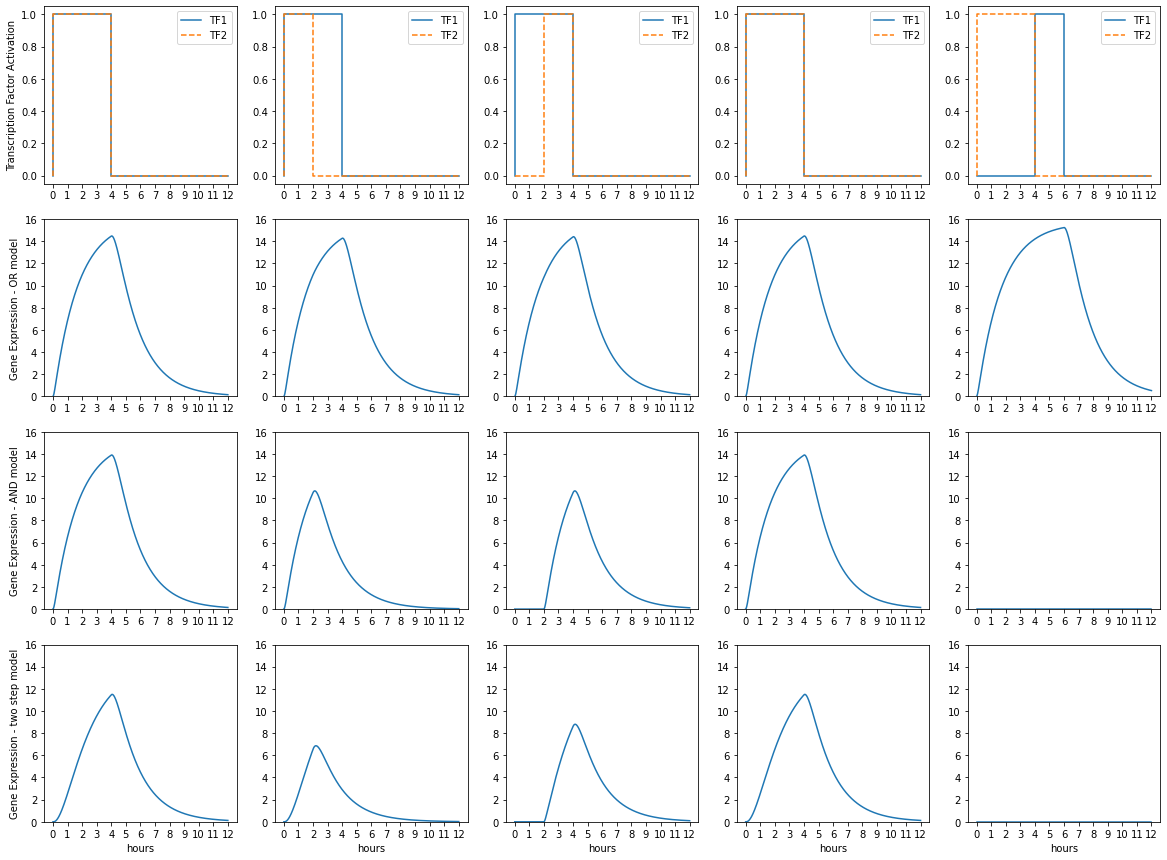

In [80]:
# Plotting all results

def box_fxn(on, off, amp, end):
    return np.array([0, on, on, off, off, end]), np.array([0, 0, amp, amp, 0, 0])

def plot_TF():
    time,TF1 = box_fxn(TF1_on, TF1_off, TF1_amp, 720)
    plt.plot(time/60, TF1, label = "TF1")
    time,TF2 = box_fxn(TF2_on, TF2_off, TF2_amp, 720)
    plt.plot(time/60, TF2, linestyle = "dashed", label = "TF2")
    plt.xticks(np.arange(0, 13, step=1))
    plt.legend()
    return 
def plot_OR_model():
    #initial conditions
    pr0 = 1
    pr_a0 = 0
    tr0 = 0 
    states0 = [pr0, pr_a0, tr0]

    t = np.linspace(0,720,1000)
    solution = odeint(OR_model,states0,t)
    plt.plot(t/60, solution[:, 2])
    plt.xticks(np.arange(0, 13, step=1))
    plt.ylim([0, 16])
    return

def plot_AND_model():
    #initial conditions
    pr0 = 1
    pr_a0 = 0
    tr0 = 0 
    states0 = [pr0, pr_a0, tr0]

    t = np.linspace(0,720,1000)
    solution = odeint(AND_model,states0,t)
    plt.plot(t/60, solution[:, 2])
    plt.xticks(np.arange(0, 13, step=1))
    plt.ylim([0, 16])
    return

def plot_two_step_model():
    #initial conditions
    pr_c0 = 1
    pr0 = 0
    pr_a0 = 0
    tr0 = 0 
    states0 = [pr_c0, pr0, pr_a0, tr0]

    t = np.linspace(0,720,1000)
    solution = odeint(two_step_model,states0,t)
    plt.plot(t/60, solution[:, 3])
    plt.xticks(np.arange(0, 13, step=1))
    plt.ylim([0, 16])
    plt.xlabel("hours")
    return

#parameters
k_a1 = 0.02
k_d1 = 0.01
k_a2 = 0.2
k_d2 = 0.05
Kd1 = 0.1
Kd2 = 0.1
k_syn = 0.2
k_deg = 0.01

plt.figure(figsize=(20, 15))

#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 0
TF2_off = 240
TF2_amp = 1

plt.subplot(4,5,1)
plot_TF()
plt.ylabel("Transcription Factor Activation")
plt.subplot(4,5,6)
plot_OR_model()
plt.ylabel("Gene Expression - OR model")
plt.subplot(4,5,11)
plot_AND_model()
plt.ylabel("Gene Expression - AND model")
plt.subplot(4,5,16)
plot_two_step_model()
plt.ylabel("Gene Expression - two step model")

#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 0
TF2_off = 120
TF2_amp = 1

plt.subplot(4,5,2)
plot_TF()
plt.subplot(4,5,7)
plot_OR_model()
plt.subplot(4,5,12)
plot_AND_model()
plt.subplot(4,5,17)
plot_two_step_model()

#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 120
TF2_off = 240
TF2_amp = 1

plt.subplot(4,5,3)
plot_TF()
plt.subplot(4,5,8)
plot_OR_model()
plt.subplot(4,5,13)
plot_AND_model()
plt.subplot(4,5,18)
plot_two_step_model()
             
#TF1 activation
TF1_on = 0
TF1_off = 240
TF1_amp = 1

#TF2 activation
TF2_on = 0
TF2_off = 240
TF2_amp = 1

plt.subplot(4,5,4)
plot_TF()
plt.subplot(4,5,9)
plot_OR_model()
plt.subplot(4,5,14)
plot_AND_model()
plt.subplot(4,5,19)
plot_two_step_model()

#TF1 activation
TF1_on = 240
TF1_off = 360
TF1_amp = 1

#TF2 activation
TF2_on = 0
TF2_off = 240
TF2_amp = 1

plt.subplot(4,5,5)
plot_TF()
plt.subplot(4,5,10)
plot_OR_model()
plt.subplot(4,5,15)
plot_AND_model()
plt.subplot(4,5,20)
plot_two_step_model()